In [31]:
print("Playground notebook")

Playground notebook


In [32]:
%notebook inline

In [33]:
from pymatgen.electronic_structure.boltztrap2 import *
from monty.serialization import loadfn
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.plotter import DosPlotter

In [34]:
# deviation from Fermi energy in eV
energy_range = 1.5
temp_r = np.arange(300,1300,300)
temps = [300, 600, 900, 1200]
dopings_r = 10.**np.arange(16,30)
dopings_arr = [1e16, 1e20, 1e27]
doping_type = 'p'

save_to_disk = False
load_from_disk = not save_to_disk

partial_dos = False

In [35]:
vrun = Vasprun('vasprun.xml',parse_projected_eigen=True)
data = VasprunBSLoader(vrun)

In [36]:
# set curvature=False to speed up in case you do not need effective mass or hall coeficients
if save_to_disk:
    bztInterp = BztInterpolator(data,lpfac=10,energy_range=energy_range,curvature=True,save_bztInterp=True, fname='bztInterp.json.gz')
    print("Saved to disk!")
elif load_from_disk:
    bztInterp = BztInterpolator(data, load_bztInterp=True, fname='bztInterp.json.gz')
    print("Loaded from disk!")

Loaded from disk!


# Compute and plot the band structure on standard symmetry path

In [37]:
# sbs = bztInterp.get_band_structure()
# list(sbs.bands.values())[0].shape
# BSPlotter(sbs).show(ylim=[-energy_range, energy_range])

# On a specific kpoint path

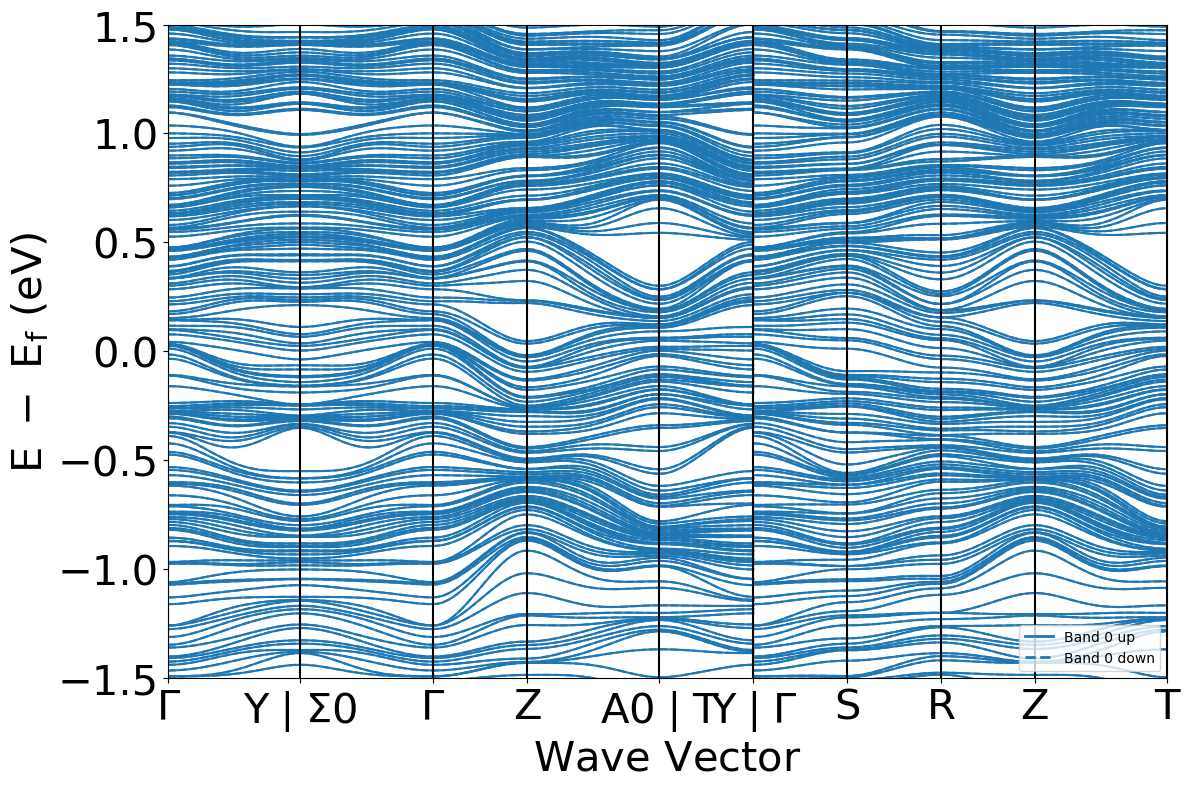

In [38]:
kpaths = [["Γ", "Y", "C0"], ["Σ0", "Γ", "Z", "A0"], ["E0", "T", "Y"], ["Γ", "S", "R", "Z", "T"]]

kp_lbl = {"A0":np.array([0.5000000000, 0.5000000000, 0.5000000000]),
          "A0'":np.array([-0.5000000000, -0.5000000000, -0.5000000000]),
          "C0":np.array([-0.5000000000, 0.5000000000, 0.0000000000]),
          "C0'":np.array([0.5000000000, -0.5000000000, -0.0000000000]),
          "E0":np.array([-0.5000000000, 0.5000000000, 0.5000000000]),
          "E0'":np.array([0.5000000000, -0.5000000000, -0.5000000000]),
          "Γ":np.array([0.0000000000, 0.0000000000, 0.0000000000]),
          "R":np.array([0.0000000000, 0.5000000000, 0.5000000000]),
          "R'":np.array([-0.0000000000, -0.5000000000, -0.5000000000]),
          "S":np.array([0.0000000000, 0.5000000000, 0.0000000000]),
          "S'":np.array([-0.0000000000, -0.5000000000, -0.0000000000]),
          "Σ0":np.array([0.5000000000, 0.5000000000, 0.0000000000]),
          "Σ0'":np.array([-0.5000000000, -0.5000000000, -0.0000000000]),
          "T":np.array([-0.5000000000, 0.5000000000, 0.5000000000]),
          "T'":np.array([0.5000000000, -0.5000000000, -0.5000000000]),
          "Y":np.array([-0.5000000000, 0.5000000000, 0.0000000000]),
          "Y'":np.array([0.5000000000, -0.5000000000, -0.0000000000]),
          "Z":np.array([0.0000000000, 0.0000000000, 0.5000000000]),
          "Z'":np.array([-0.0000000000, -0.0000000000, -0.5000000000]),
          }
sbs = bztInterp.get_band_structure(kpaths,kp_lbl)
BSPlotter(sbs).show(ylim=[-energy_range, energy_range])

# Compute and plot Dos

In [39]:
tot_dos = bztInterp.get_dos()

In [40]:
if partial_dos:
    tot_proj_dos = bztInterp.get_dos(partial_dos=True, progress=True)

    pltdos = DosPlotter(sigma=0.004)
    pltdos.add_dos_dict(tot_proj_dos.get_element_dos())
    pltdos.show()

# Transport Properties

In [41]:
if save_to_disk:
    bztTransp = BztTransportProperties(bztInterp, temp_r=temp_r, doping=dopings_r, save_bztTranspProps=True, fname='bztTranspProps.json.gz')
    print("Saved to disk!")
elif load_from_disk:
    bztTransp = BztTransportProperties(bztInterp, load_bztTranspProps=True, fname='bztTranspProps.json.gz')
    print("Loaded from disk!")

Loaded from disk!


In [42]:
print('\t'.join(['Temp', '\mu', 'rows', 'columns tensor']))
for p in bztTransp.Conductivity_mu, bztTransp.Seebeck_mu, bztTransp.Kappa_mu, \
         bztTransp.Effective_mass_mu, bztTransp.Power_Factor_mu, bztTransp.Carrier_conc_mu:
    print('\t'.join([str(i) for i in p.shape]))

Temp	\mu	rows	columns tensor
4	1670	3	3
4	1670	3	3
4	1670	3	3
4	1670	3	3
4	1670	3	3
4	1670


In [43]:
bztTransp.compute_properties_doping(doping=dopings_r)

In [44]:
print('\t'.join(['Temp', 'Doping', 'rows', 'columns tensor']))
for p in bztTransp.Conductivity_doping, bztTransp.Seebeck_doping, bztTransp.Kappa_doping, \
         bztTransp.Carriers_conc_doping,bztTransp.Effective_mass_doping, bztTransp.Power_Factor_doping:
    print('\t'.join([str(i) for i in p[doping_type].shape]))

Temp	Doping	rows	columns tensor
4	14	3	3
4	14	3	3
4	14	3	3
4	14
4	14	3	3
4	14	3	3


# Plots!

In [45]:
bztPlotter = BztPlotter(bztTransp,bztInterp)

<module 'matplotlib.pyplot' from '/Users/max/opt/anaconda3/envs/boltztrap2/lib/python3.9/site-packages/matplotlib/pyplot.py'>

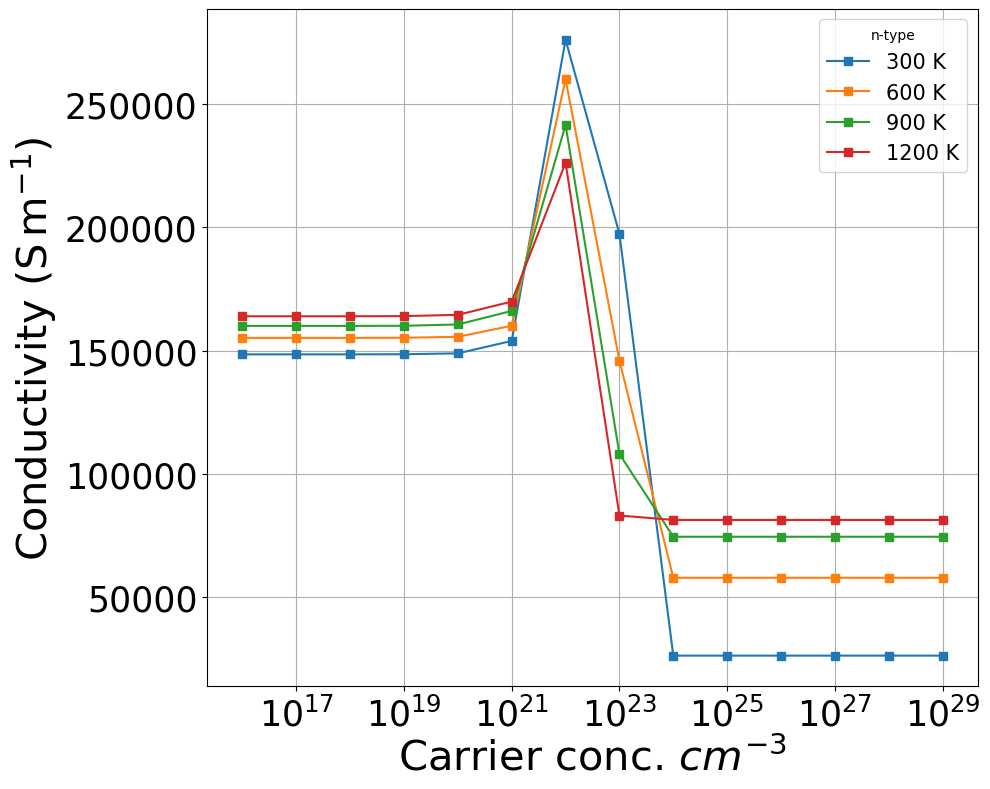

In [46]:
bztPlotter.plot_props('C','doping','temp',temps=temps)

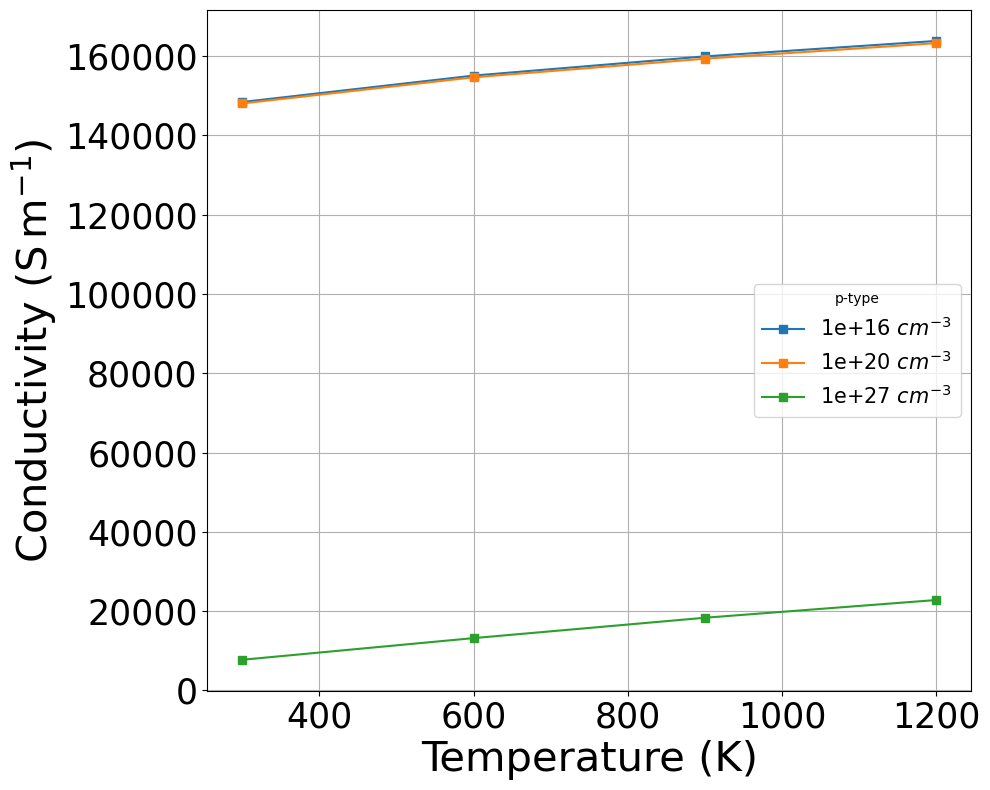

In [47]:
bztPlotter.plot_props('C','temp','doping',doping=dopings_arr, dop_type=doping_type).show()

<module 'matplotlib.pyplot' from '/Users/max/opt/anaconda3/envs/boltztrap2/lib/python3.9/site-packages/matplotlib/pyplot.py'>

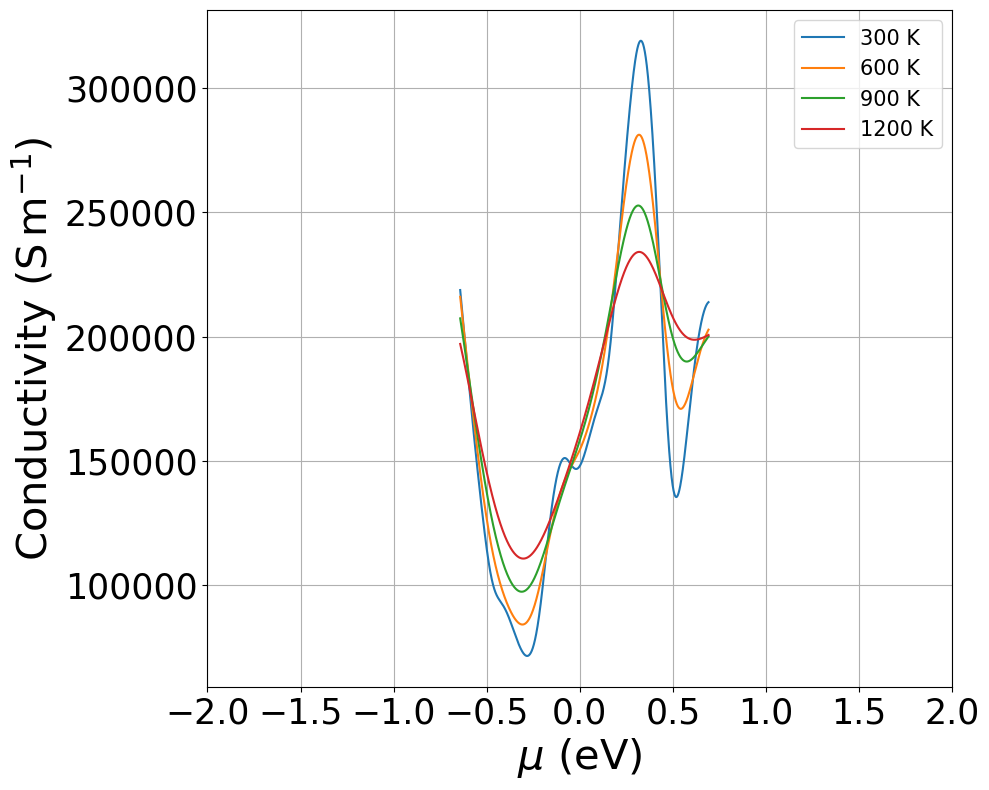

In [48]:
bztPlotter.plot_props('C','mu','temp',temps=temps)

<module 'matplotlib.pyplot' from '/Users/max/opt/anaconda3/envs/boltztrap2/lib/python3.9/site-packages/matplotlib/pyplot.py'>

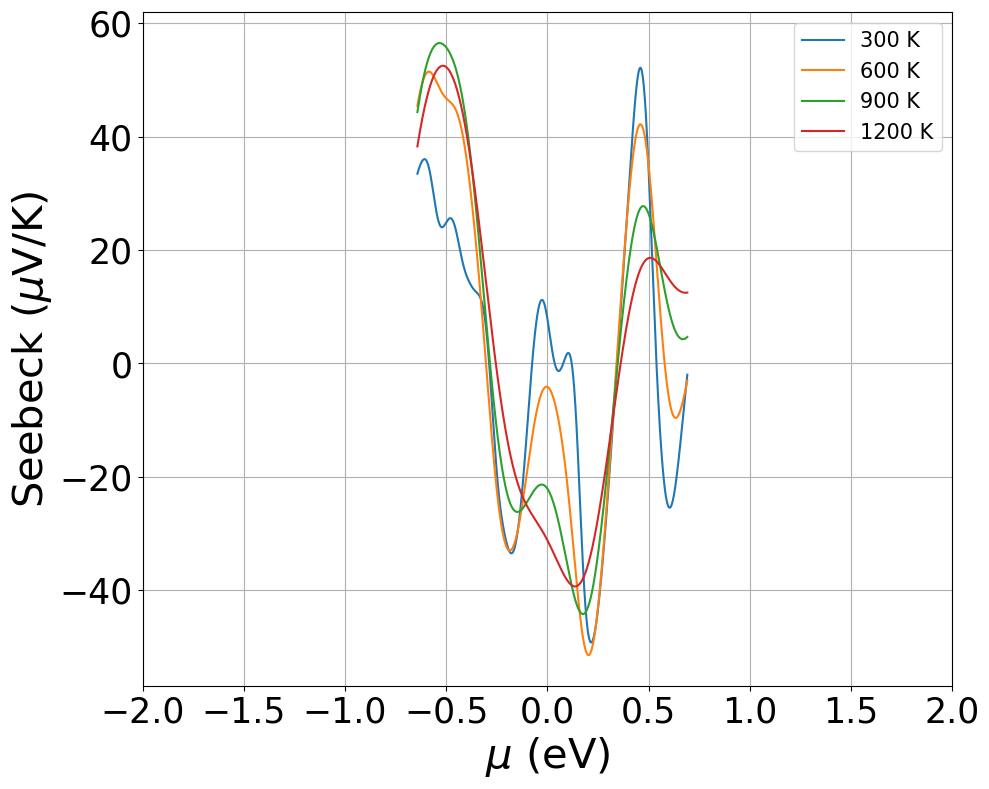

In [49]:
bztPlotter.plot_props('S','mu','temp',temps=temps)

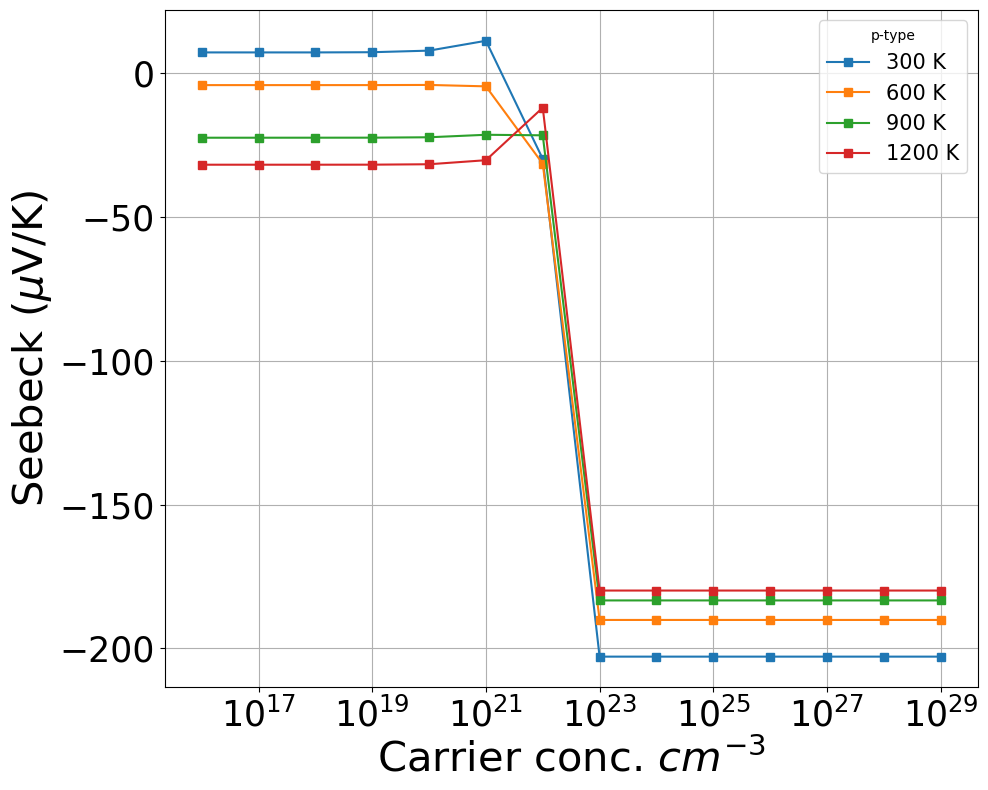

In [50]:
bztPlotter.plot_props('S','doping','temp', temps=temps, dop_type=doping_type).show()

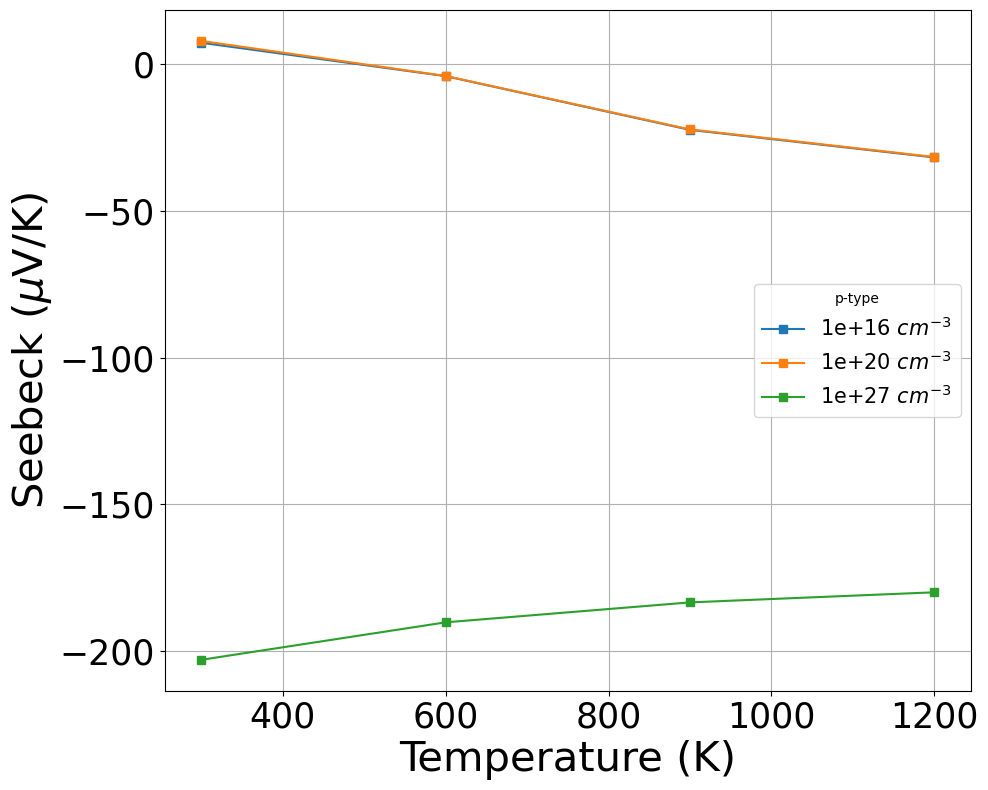

In [51]:
bztPlotter.plot_props('S','temp','doping',doping=dopings_arr, dop_type=doping_type).show()

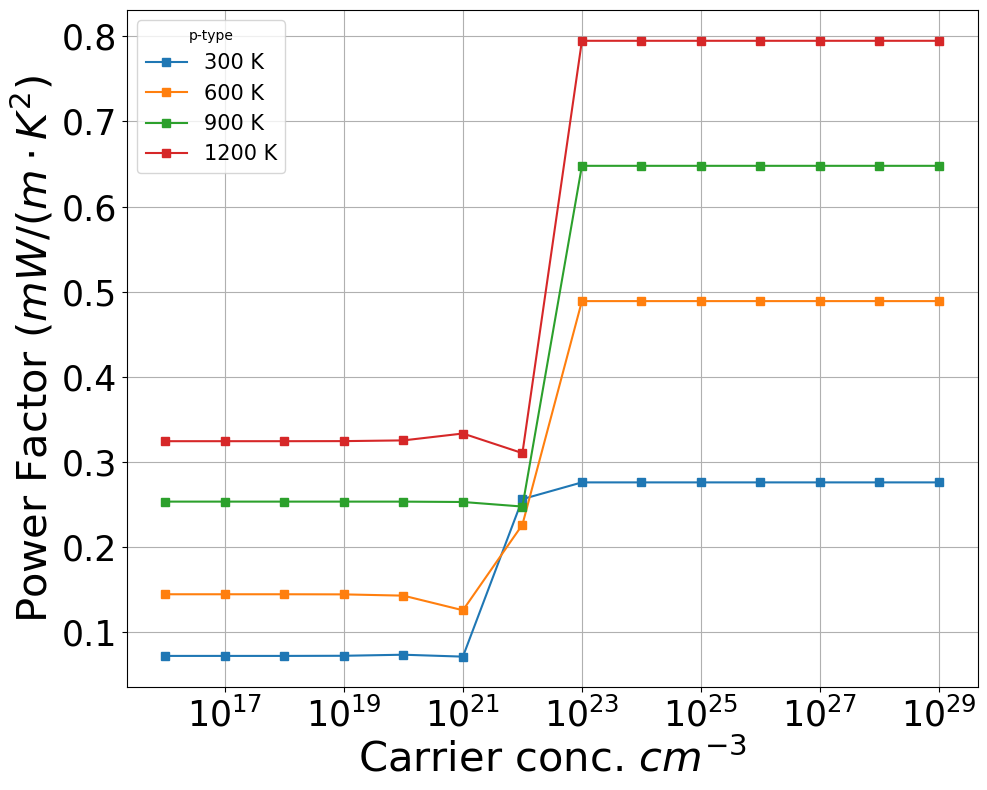

In [52]:
bztPlotter.plot_props('Po','doping','temp',temps=temps,dop_type=doping_type).show()

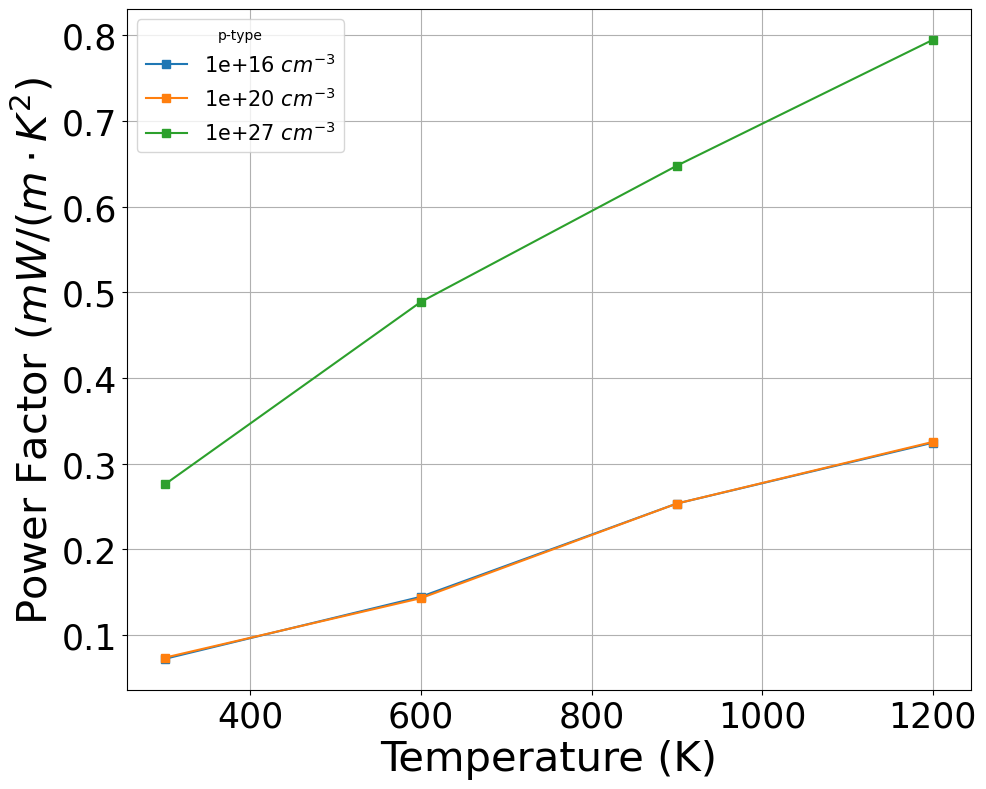

In [53]:
bztPlotter.plot_props('Po','temp','doping',doping=dopings_arr, dop_type=doping_type).show()

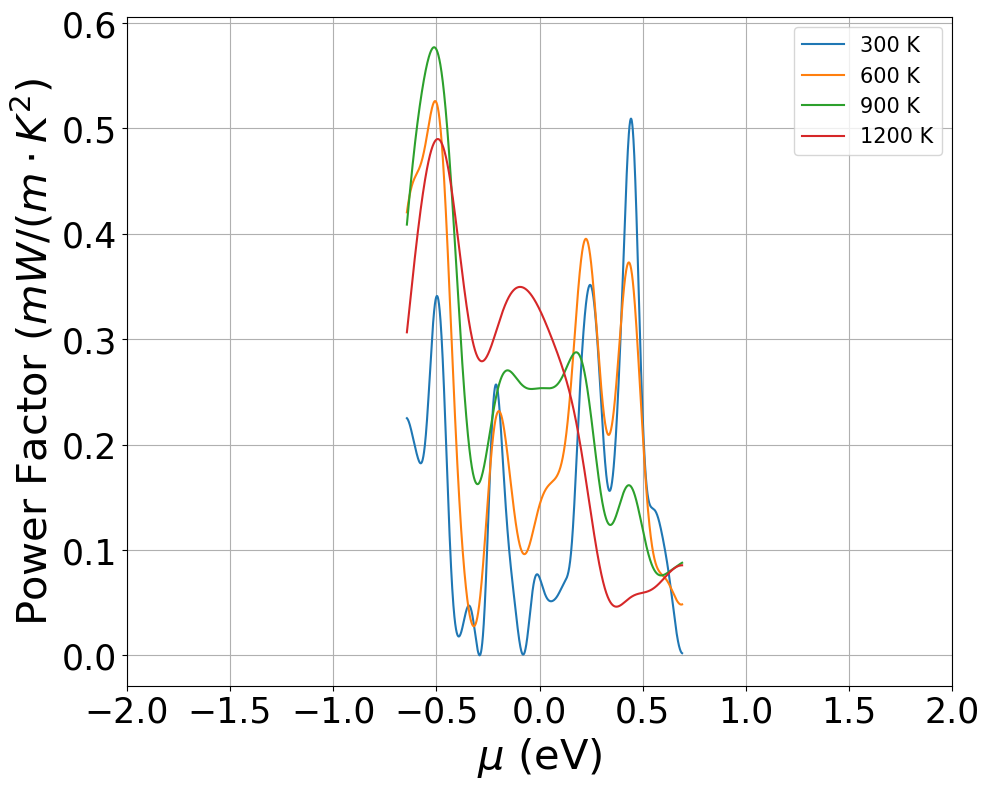

In [54]:
bztPlotter.plot_props('Po','mu','temp',temps=temps,dop_type=doping_type).show()

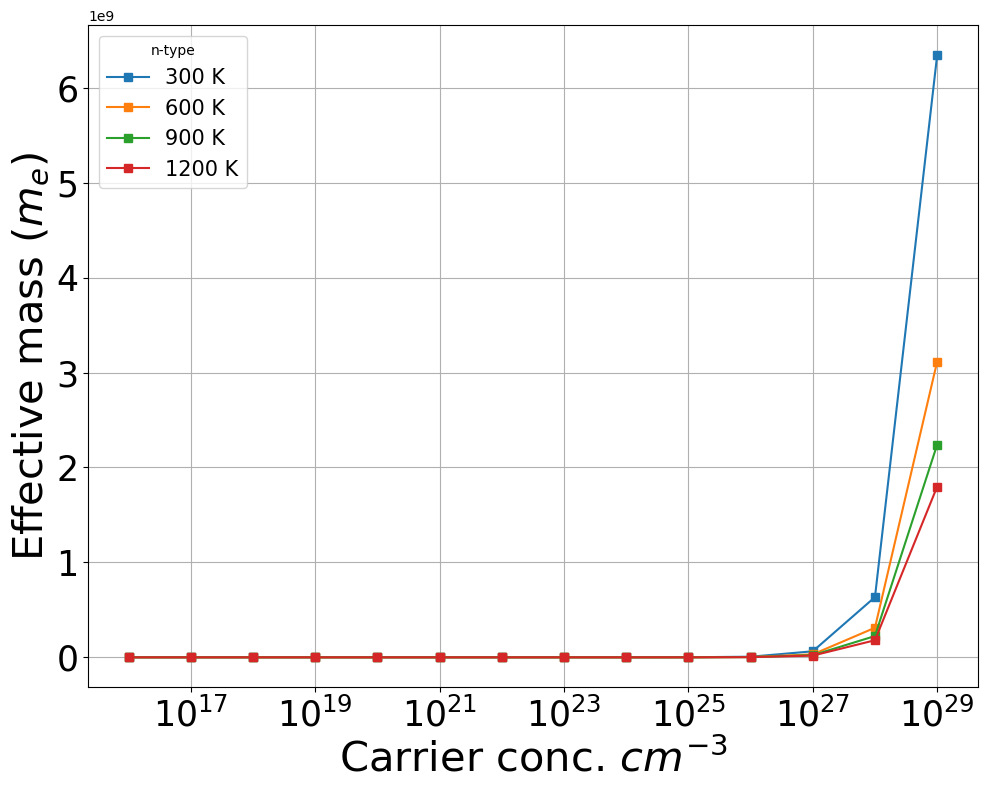

In [55]:
bztPlotter.plot_props('E','doping','temp',temps=temps).show()

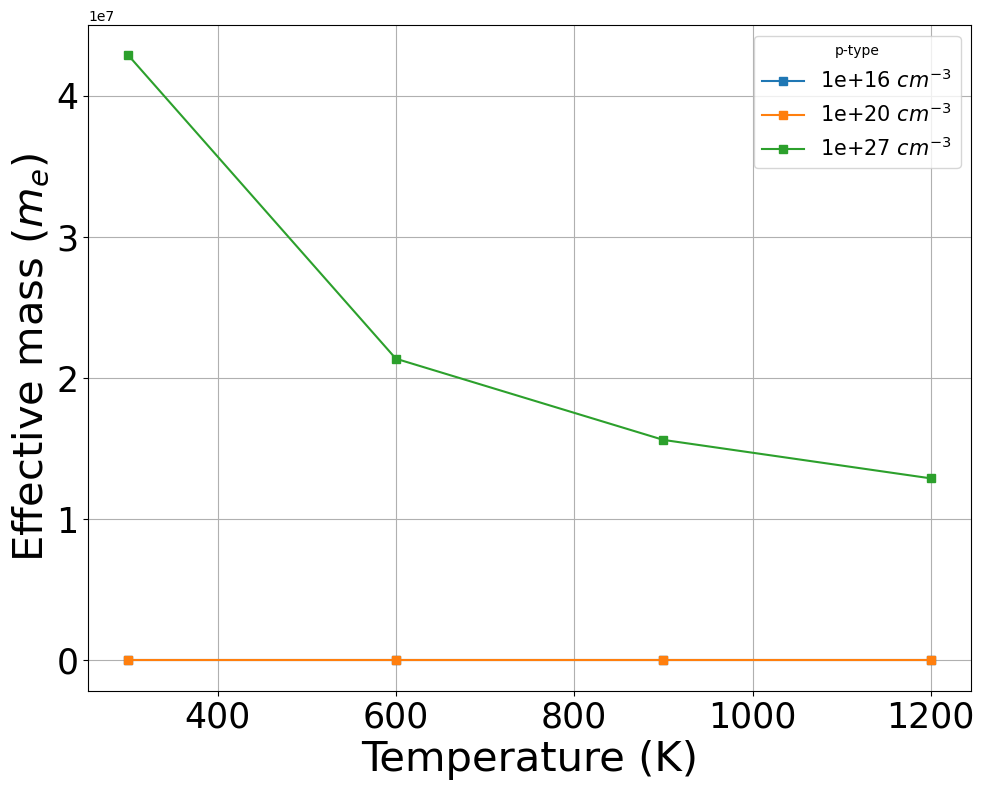

In [56]:
bztPlotter.plot_props('E','temp','doping',doping=dopings_arr, dop_type=doping_type).show()

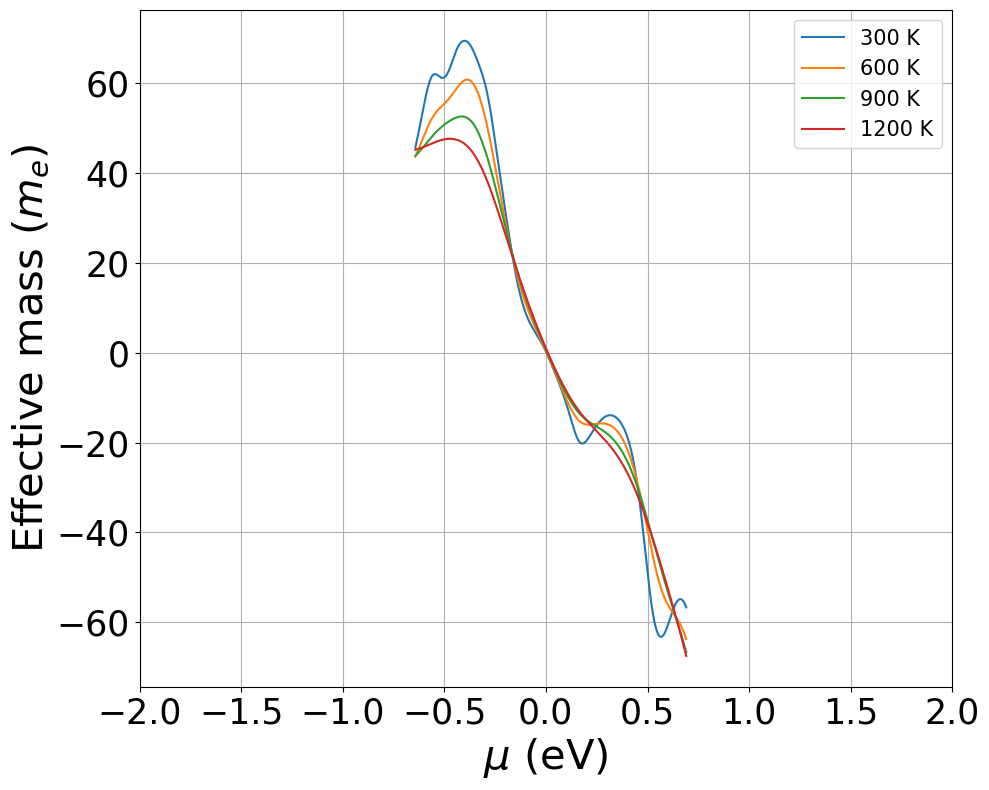

In [57]:
bztPlotter.plot_props('E','mu','temp',temps=temps).show()

# Misc things

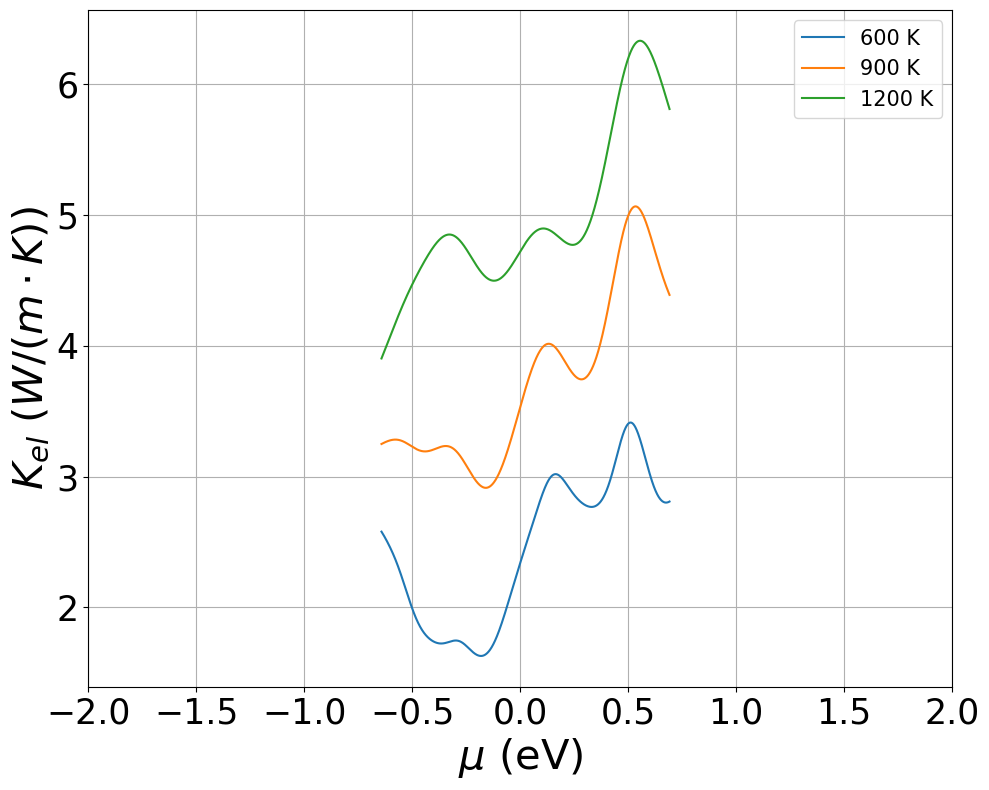

In [58]:
bztPlotter.plot_props('K','mu','temp',temps=[600,900,1200]).show()

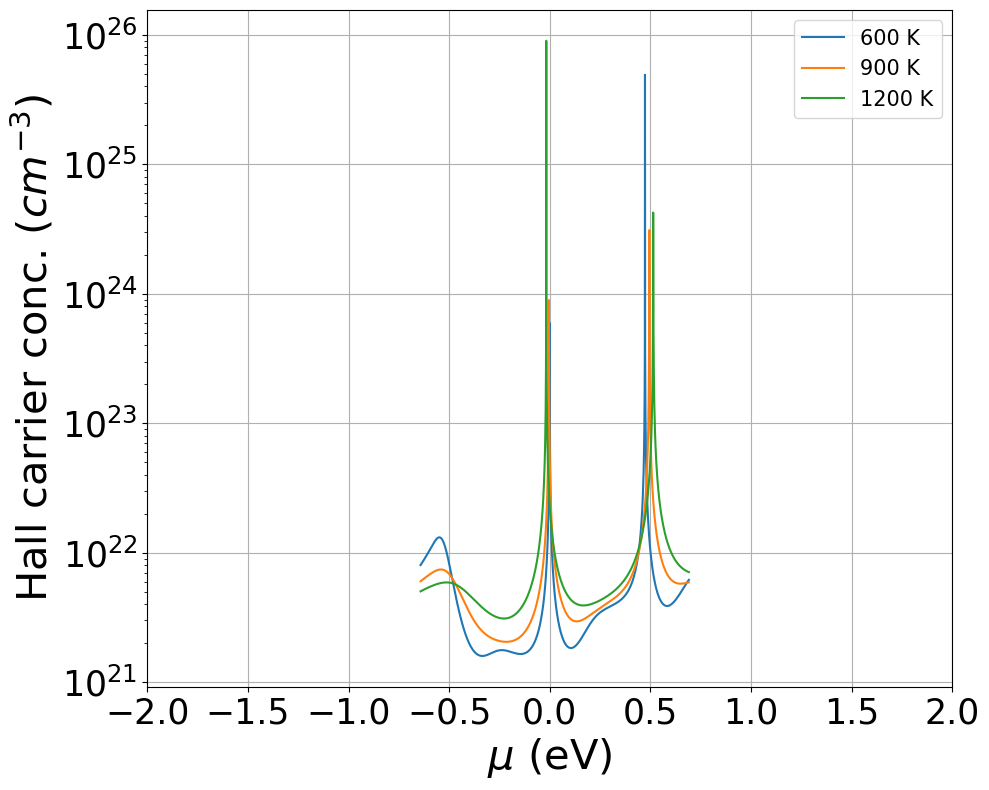

In [59]:
bztPlotter.plot_props('H','mu','temp',temps=[600,900,1200]).show()

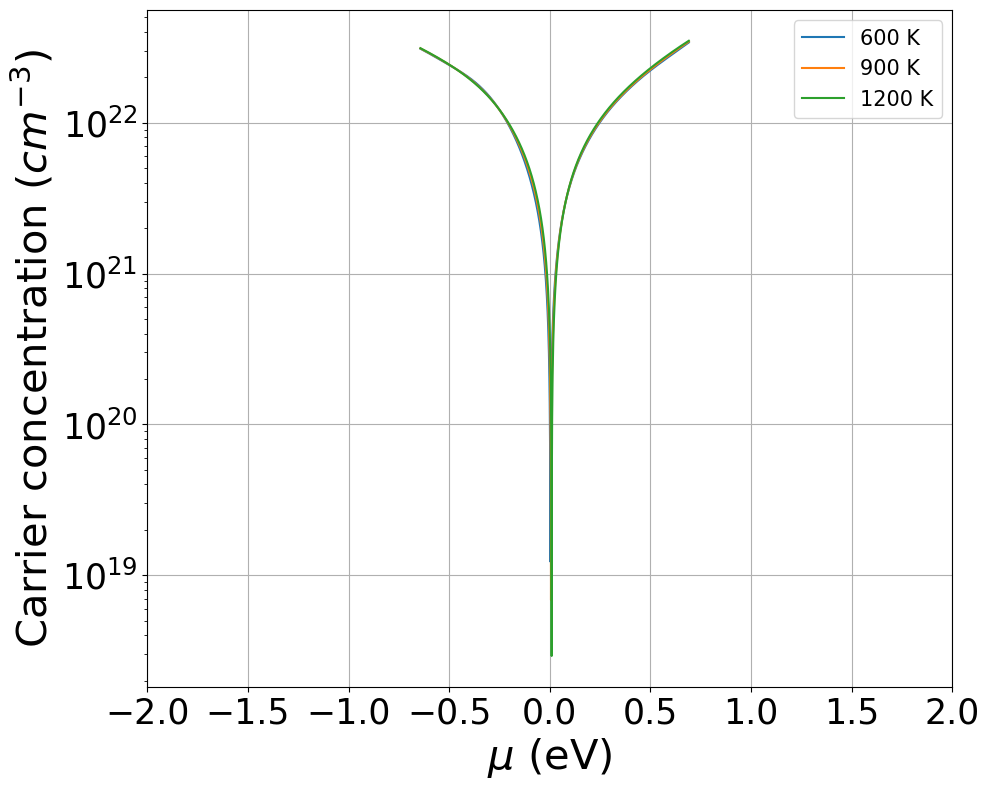

In [60]:
bztPlotter.plot_props('Ca','mu','temp',temps=[600,900,1200]).show()

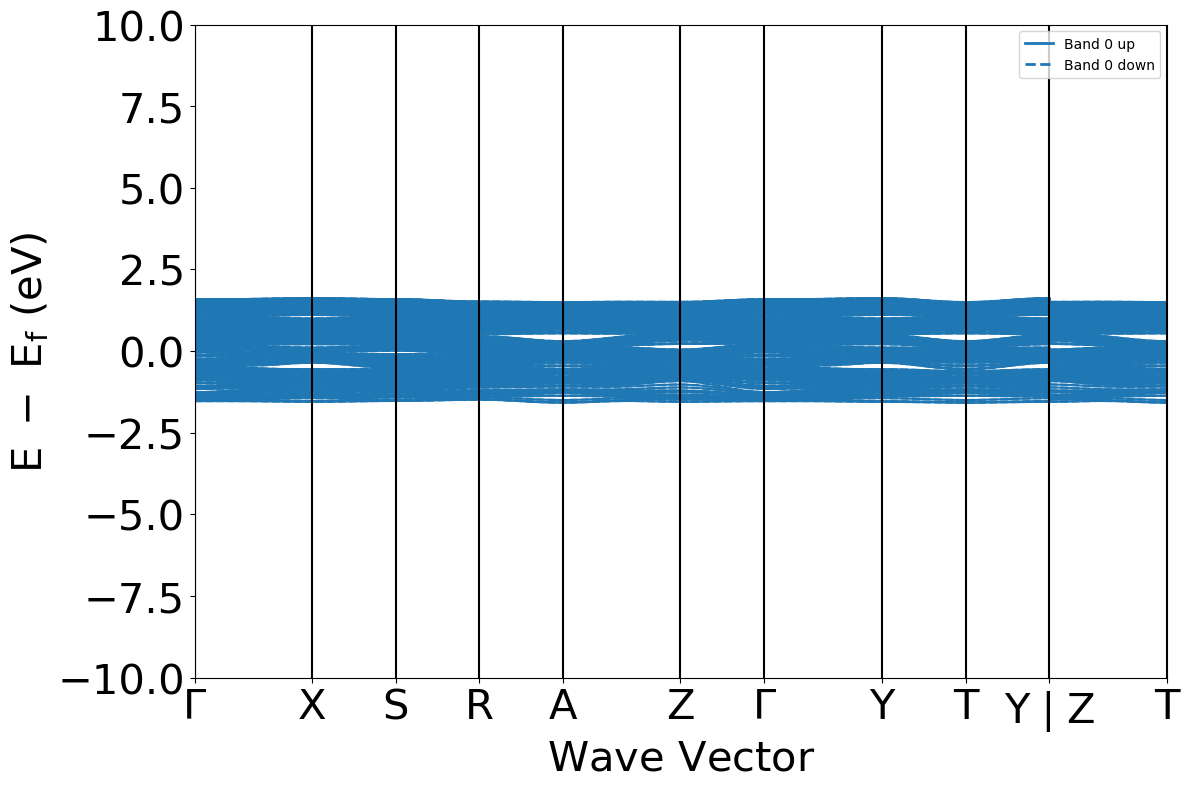

In [64]:
bztPlotter.plot_bands().show()

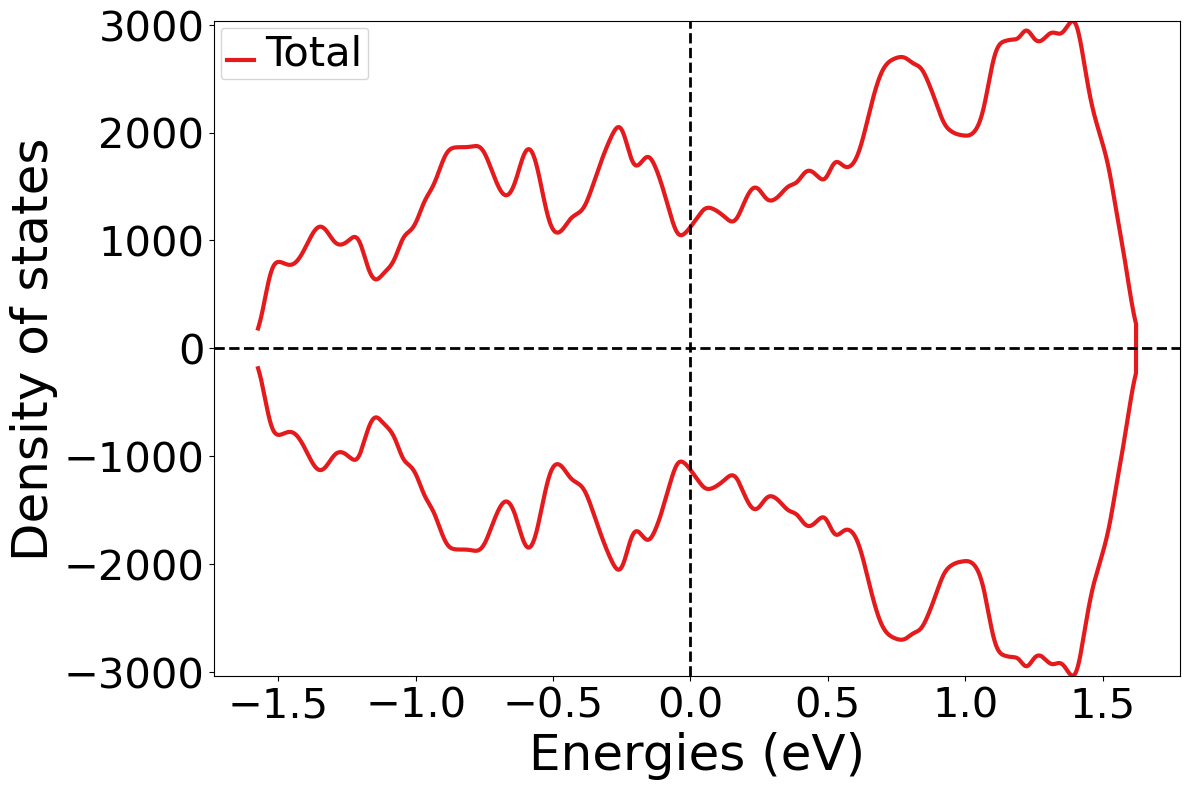

In [62]:
bztPlotter.plot_dos(T=200).show()